### Singular Value Decomposition

So far in this lesson, you have gained some exposure to Singular Value Decomposition.  In this notebook, you will get some hands on practice with this technique.

Let's get started by reading in our libraries and setting up the data we will be using throughout this notebook

`1.` Run the cell below to create the **user_movie_subset** dataframe.  This will be the dataframe you will be using for the first part of this notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import svd_tests as t
%matplotlib inline

# Read in the datasets
movies = pd.read_csv('../data/movies_clean.csv')
reviews = pd.read_csv('../data/reviews_clean.csv')

del movies['Unnamed: 0']
del reviews['Unnamed: 0']

# Create user-by-item matrix
user_items = reviews[['user_id', 'movie_id', 'rating']]
user_by_movie = user_items.groupby(['user_id', 'movie_id'])['rating'].max().unstack()

user_movie_subset = user_by_movie[[75314,  68646, 99685]].dropna(axis=0)
print(user_movie_subset)

movie_id  75314  68646  99685
user_id                      
2213        7.0   10.0    8.0
2223        6.0   10.0    7.0
2942        8.0    9.0    8.0
3298        8.0   10.0   10.0
3424        9.0    9.0    9.0
5205        8.0    9.0    9.0


`2.` Now that you have the **user_movie_subset** matrix, use this matrix to correctly match each key to the correct value in the dictionary below.  Use the cells below the dictionary as necessary.

In [3]:
# match each letter to the best statement in the dictionary below - each will be used at most once
a = 6
b = 68646
c = 'The Godfather'
d = 'Goodfellas'
e = 3298
f = 30685
g = 3

sol_1_dict = {
    'the number of users in the user_movie_subset': a,#enter a letter,
    'the number of movies in the user_movie_subset': g, #enter a letter,
    'the user_id with the highest average ratings given': e,#enter a letter,
    'the movie_id with the highest average ratings received': b,#enter a letter,
    'the name of the movie that received the highest average rating': c#enter a letter,
}


#test dictionary here
t.test1(sol_1_dict)

That's right!  There are 6 users in the dataset, which is given by the number of rows. There are 3 movies in the dataset given by the number of columns.  You can find the movies or users with the highest average ratings by taking the mean of each row or column.  Using the movies table, you can find the movie names associated with each id.


In [8]:
# Cell for work
# user with the highest average rating
print(user_movie_subset.mean(axis=1))

# movie with highest average rating
print(user_movie_subset.mean(axis=0))

# list of movie names
for movie_id in [73486, 75314,  68646, 99685]:
    print(movies[movies['movie_id'] == movie_id]['movie'])
    
# users by movies
user_movie_subset.shape

user_id
2213    8.333333
2223    7.666667
2942    8.333333
3298    9.333333
3424    9.000000
5205    8.666667
dtype: float64
movie_id
75314    7.666667
68646    9.500000
99685    8.500000
dtype: float64
4505    One Flew Over the Cuckoo's Nest (1975)
Name: movie, dtype: object
4692    Taxi Driver (1976)
Name: movie, dtype: object
3988    The Godfather (1972)
Name: movie, dtype: object
7404    Goodfellas (1990)
Name: movie, dtype: object


(6, 3)

Now that you have a little more context about the matrix we will be performing Singular Value Decomposition on, we're going to do just that.  To get started, let's remind ourselves about the dimensions of each of the matrices we are going to get back.   Essentially, we are going to split the **user_movie_subset** matrix into three matrices:

$$ U \Sigma V^T $$


`3.` Given what you learned about in the previous parts of this lesson, provide the dimensions for each of the matrices specified above using the dictionary below.

In [9]:
# match each letter in the dictionary below - a letter may appear more than once.
a = 'a number that you can choose as the number of latent features to keep'
b = 'the number of users'
c = 'the number of movies'
d = 'the sum of the number of users and movies'
e = 'the product of the number of users and movies'

sol_2_dict = {
    'the number of rows in the U matrix': b,#enter a letter, 
    'the number of columns in the U matrix': a,#enter a letter, 
    'the number of rows in the V transpose matrix': a,#enter a letter, 
    'the number of columns in the V transpose matrix': c#enter a letter
}

#test dictionary here
t.test2(sol_2_dict)

That's right!  We will now put this to use, so you can see how the dot product of these matrices come together to create our user item matrix.  The number of latent features will control the sigma matrix as well, and this will a square matrix that will at most be the minimum of the number of users and number of movies (in our case the minimum is the 4 movies).


Now let's verify the above dimensions by performing SVD on our user-movie matrix.

`4.` Below you can find the code used to perform SVD in numpy.  You can see more about this functionality in the [documentation here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html).  What do you notice about the shapes of your matrices?  If you try to take the dot product of the three objects you get back, can you directly do this to get back the user-movie matrix?

In [10]:
u, s, vt = np.linalg.svd(user_movie_subset)
s.shape, u.shape, vt.shape

((3,), (6, 6), (3, 3))

In [11]:
# Run this cell for our thoughts on the questions posted above
t.question4thoughts()

Looking at the dimensions of the three returned objects, we can see the following:

 1. The u matrix is a square matrix with the number of rows and columns equaling the number of users. 

 2. The v transpose matrix is also a square matrix with the number of rows and columns equaling the number of items.

 3. The sigma matrix is actually returned as just an array with 3 values.  

 In order to set up the matrices in a way that they can be multiplied together, we have a few steps to perform: 

 1. Turn sigma into a square matrix with the number of latent features we would like to keep. 

 2. Change the columns of u and the rows of v transpose to match this number of dimensions. 

 If we would like to exactly re-create the user-movie matrix, we could choose to keep all of the latent features.


`5.` Use the thoughts from the above question to create **u**, **s**, and **vt** with three (the max number for this matrix) latent features.  When you have all three matrices created correctly, run the test below to show that the dot product of the three matrices creates the original user-movie matrix.  The matrices should have the following dimensions:

$$ U_{n x k} $$

$$\Sigma_{k x k} $$

$$V^T_{k x m} $$

where:

1. n is the number of users
2. k is the number of latent features to keep
3. m is the number of movies


In [14]:
# Change the dimensions of u, s, and vt as necessary to use three latent features
# update the shape of u and store in u_new
u_new = u[:, :len(s)]#implement your code here

# update the shape of s and store in s_new
s_new = np.zeros((len(s), len(s)))#implement your code here
s_new[:len(s), :len(s)] = np.diag(s)

# Because we are using 3 latent features and there are only 3 movies, 
# vt and vt_new are the same
vt_new = vt#implement your code here

In [15]:
# Check your matrices against the solution
assert u_new.shape == (6, 3), "Oops!  The shape of the u matrix doesn't look right. It should be 6 by 3."
assert s_new.shape == (3, 3), "Oops!  The shape of the sigma matrix doesn't look right.  It should be 3 x 3."
assert vt_new.shape == (3, 3), "Oops! The shape of the v transpose matrix doesn't look right.  It should be 3 x 3."
assert np.allclose(np.dot(np.dot(u_new, s_new), vt_new), user_movie_subset), "Oops!  Something went wrong with the dot product.  Your result didn't reproduce the original movie_user matrix."
print("That's right! The dimensions of u should be 6 x 3, and both v transpose and sigma should be 3 x 3.  The dot product of the three matrices how equals the original user-movie matrix!")

That's right! The dimensions of u should be 6 x 3, and both v transpose and sigma should be 3 x 3.  The dot product of the three matrices how equals the original user-movie matrix!


`6.` Scikit-learn also has an easy way to implement SVD.  The documentation for this implementation can be found [in the scikit-learn documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).  Below, we have imported this library, as well as created the 1-0 user-movie matrix used earlier in this lesson. Use `fit_transform` on the `user_by_movie` matrix to obtain

$$ U \Sigma V^T $$

with 200 components and 5 iterations.

In [18]:
from sklearn.decomposition import TruncatedSVD

user_by_movie = user_by_movie.map(lambda val: 1 if val > 0 else 0)

svd = TruncatedSVD(n_components=200, n_iter=5, random_state=42)

u = svd.fit_transform(user_by_movie)# code for u matrix
vt = svd.components_# code for vt
s = svd.singular_values_# code for sigma
print('u', u.shape)
print('s', s.shape)
print('vt', vt.shape)

u (8022, 200)
s (200,)
vt (200, 13850)


`7.` How much variability can be explained by each of the 200 components?  How much of the variability can be explained in total by the 200 components?

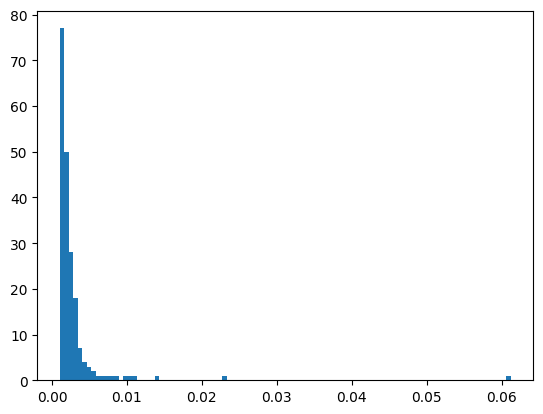

In [19]:
plt.hist(svd.explained_variance_ratio_, bins=100);

`8.` Create your prediction matrix and verify it is the shape you would expect.

In [20]:
s_new = np.zeros((len(s), len(s)))
s_new[:len(s), :len(s)] = np.diag(s) 

pred_ratings = np.dot(np.dot(u, s_new), vt)

In [21]:
pred_ratings.shape, user_by_movie.shape

((8022, 13850), (8022, 13850))